Purpose: Run PCA of TPM for the following samples mapped to B73: all B73, all Mo17, all W22, all CML69, all Oh43 (>500 samples total).<br>
Author: Anna Pardo<br>
Date initiated: April 28, 2023

In [1]:
# load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

In [2]:
# load TPM matrix
## this TPM was generated by running tximport on all the samples described above
tpm = pd.read_csv("TPM_LS_mapB73_nf-core_27-Apr-2023.txt",sep="\t",header="infer",index_col="GeneID")
tpm.head()

,SRR8857799,SRR8857793,SRR15241108,SRR15241156,SRR8857749,SRR8857746,SRR15241170,SRR8857844,SRR9282931,SRR2106196,...,SRR15241292,SRR15241281,SRR15241321,SRR12214348,SRR15241327,SRR12214377,SRR15241326,SRR12214374,SRR12214352,SRR15241319
GeneID,,,,,,,,,,,,,,,,,,,,,
Zm00001eb000010,8.477884,1.349336,15.116249,13.781893,4.872421,32.421567,13.266106,10.918767,1.099232,5.291619,...,12.355163,21.049118,9.535489,12.052756,10.945717,11.219040,8.066795,15.008765,9.932600,13.488960
Zm00001eb000020,102.011193,39.493900,0.808690,0.565147,13.808307,1.344191,1.035099,124.754873,45.137300,18.872878,...,0.184505,0.458082,0.255254,1.053906,0.456107,1.822988,0.237454,1.641823,1.577966,0.432152
Zm00001eb000050,0.492838,0.000000,0.000000,0.000000,0.519128,2.733165,0.000000,1.152023,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zm00001eb000060,28.480082,7.311609,35.563727,18.684174,7.134804,28.603220,22.302009,34.742011,2.411356,4.794730,...,15.936412,19.830817,14.213556,19.629279,12.166175,18.421093,9.438759,25.698837,20.623343,17.958151
Zm00001eb000070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.226282,0.000000,0.000000,0.000000,0.115324


In [3]:
# define a function from an answer in https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def variance_threshold_selector(data):
    selector = VarianceThreshold()
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [4]:
# transpose TPM data
ttpm = tpm.transpose()
ttpm.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
SRR8857799,8.477884,102.011193,0.492838,28.480082,0.0,25.786615,0.390458,0.0,1.041538,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.267260,0.0,0.0,0.000000
SRR8857793,1.349336,39.493900,0.000000,7.311609,0.0,14.504660,1.032018,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.135086,0.0,0.0,0.000000
SRR15241108,15.116249,0.808690,0.000000,35.563727,0.0,10.080573,0.000000,0.0,0.288952,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.480562,0.0,0.0,0.000000
SRR15241156,13.781893,0.565147,0.000000,18.684174,0.0,9.818174,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.228073,0.0,0.0,0.0,0.413354,0.0,0.0,0.880361
SRR8857749,4.872421,13.808307,0.519128,7.134804,0.0,4.857101,0.094921,0.0,0.381624,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.021196,0.0,0.0,0.000000


In [5]:
# put through VarianceThreshold() using the variance_threshold_selector() defined above
vttpm = variance_threshold_selector(ttpm)
vttpm.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442830,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
SRR8857799,8.477884,102.011193,0.492838,28.480082,0.0,25.786615,0.390458,0.0,1.041538,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.267260,0.0,0.0,0.000000
SRR8857793,1.349336,39.493900,0.000000,7.311609,0.0,14.504660,1.032018,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,5.135086,0.0,0.0,0.000000
SRR15241108,15.116249,0.808690,0.000000,35.563727,0.0,10.080573,0.000000,0.0,0.288952,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.480562,0.0,0.0,0.000000
SRR15241156,13.781893,0.565147,0.000000,18.684174,0.0,9.818174,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.228073,0.0,0.0,0.413354,0.0,0.0,0.880361
SRR8857749,4.872421,13.808307,0.519128,7.134804,0.0,4.857101,0.094921,0.0,0.381624,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.021196,0.0,0.0,0.000000


In [6]:
len(ttpm.columns)

39092

In [7]:
len(vttpm.columns)

38901

Running `VarianceThreshold()` eliminated 191 low-variance genes.

In [8]:
vttpm_log = vttpm.apply(lambda x: np.log2(x+1))
vttpm_log.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442830,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
SRR8857799,3.244565,6.686657,0.578058,4.881669,0.0,4.743440,0.475560,0.0,1.029656,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.341713,0.0,0.0,0.00000
SRR8857793,1.232253,5.339633,0.000000,3.055128,0.0,3.954630,1.022913,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.617084,0.0,0.0,0.00000
SRR15241108,4.010444,0.854945,0.000000,5.192341,0.0,3.469961,0.000000,0.0,0.366199,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.566145,0.0,0.0,0.00000
SRR15241156,3.885759,0.646298,0.000000,4.298964,0.0,3.435385,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.296396,0.0,0.0,0.499123,0.0,0.0,0.91101
SRR8857749,2.553955,3.888335,0.603243,3.024108,0.0,2.550187,0.130827,0.0,0.466365,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.015209,0.0,0.0,0.00000


In [9]:
pca = PCA(n_components=2)
real_PCs = pca.fit_transform(vttpm_log)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])

In [10]:
real_PCs_df

,PC1,PC2
0,181.697368,-59.165437
1,202.819544,-5.185001
2,-117.462444,-45.852541
3,-116.278547,-30.209548
4,5.781672,105.115463
...,...,...
510,-96.795902,-47.148634
511,-148.443860,-4.285952
512,-87.086260,-64.103429
513,-143.477935,-10.402167


In [11]:
# find the explained variance ratio
pca.explained_variance_ratio_

array([0.28708135, 0.16617365])

In [12]:
## reset index (after running PCA)
vttpm_log.reset_index(inplace=True)
vttpm_log.head()

GeneID,index,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442830,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR8857799,3.244565,6.686657,0.578058,4.881669,0.0,4.743440,0.475560,0.0,1.029656,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.341713,0.0,0.0,0.00000
1,SRR8857793,1.232253,5.339633,0.000000,3.055128,0.0,3.954630,1.022913,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.617084,0.0,0.0,0.00000
2,SRR15241108,4.010444,0.854945,0.000000,5.192341,0.0,3.469961,0.000000,0.0,0.366199,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.566145,0.0,0.0,0.00000
3,SRR15241156,3.885759,0.646298,0.000000,4.298964,0.0,3.435385,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.296396,0.0,0.0,0.499123,0.0,0.0,0.91101
4,SRR8857749,2.553955,3.888335,0.603243,3.024108,0.0,2.550187,0.130827,0.0,0.466365,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.015209,0.0,0.0,0.00000


In [13]:
# load metadata
md = pd.read_csv("srr_numbers_with_metadata_14-Apr-2023.tsv",sep="\t",header="infer")
md.head()

,BioProject,SRA_number,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,Time_after_treatment,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [14]:
# in vttpm_log, rename column "index" to "SRA_number"
vttpm_log.rename(columns={"index":"SRA_number"},inplace=True)
vttpm_log.head()

GeneID,SRA_number,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442830,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR8857799,3.244565,6.686657,0.578058,4.881669,0.0,4.743440,0.475560,0.0,1.029656,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.341713,0.0,0.0,0.00000
1,SRR8857793,1.232253,5.339633,0.000000,3.055128,0.0,3.954630,1.022913,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.617084,0.0,0.0,0.00000
2,SRR15241108,4.010444,0.854945,0.000000,5.192341,0.0,3.469961,0.000000,0.0,0.366199,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.566145,0.0,0.0,0.00000
3,SRR15241156,3.885759,0.646298,0.000000,4.298964,0.0,3.435385,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.296396,0.0,0.0,0.499123,0.0,0.0,0.91101
4,SRR8857749,2.553955,3.888335,0.603243,3.024108,0.0,2.550187,0.130827,0.0,0.466365,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.015209,0.0,0.0,0.00000


In [15]:
# merge with metadata
## note this has to maintain the sample order of vttpm_log, otherwise when we concatenate it with the PC df everything will be
## incorrectly matched up
vttpm_log_merged = vttpm_log.merge(md,how="inner")
vttpm_log_merged.head()

,SRA_number,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,SRR8857799,3.244565,6.686657,0.578058,4.881669,0.0,4.743440,0.475560,0.0,1.029656,...,V3,Stalk,14.0,38.0,NaN,65,NaN,Phytotron,NaN,NaN
1,SRR8857793,1.232253,5.339633,0.000000,3.055128,0.0,3.954630,1.022913,0.0,0.000000,...,V3,Root,14.0,25.0,NaN,65,NaN,Phytotron,NaN,NaN
2,SRR15241108,4.010444,0.854945,0.000000,5.192341,0.0,3.469961,0.000000,0.0,0.366199,...,V2/V3,Leaf,16.0,30.0,20.0,NaN,NaN,NaN,NaN,NaN
3,SRR15241156,3.885759,0.646298,0.000000,4.298964,0.0,3.435385,0.000000,0.0,0.000000,...,V2/V3,Leaf,16.0,39.0,29.0,NaN,NaN,NaN,NaN,NaN
4,SRR8857749,2.553955,3.888335,0.603243,3.024108,0.0,2.550187,0.130827,0.0,0.466365,...,R1,Tassel,14.0,38.0,NaN,65,NaN,Phytotron,NaN,NaN


In [16]:
for i in list(vttpm_log_merged.columns):
    if not i.startswith("Zm"):
        print(i)

SRA_number
BioProject
sample_name
Replicate_num
Genotype
Technology
Library_layout
Treatment
Duration_hours
Time_after_treatment
Concentration_mM
Concentration
Developmental_stage
Tissue
Day_length_hours
Day_temp_C
Night_temp_C
Relative humidity (%)
Light (umol/m2/s)
Growth Env.
Media
Notes


In [17]:
# append metadata to PCA df
plotdf = pd.concat([real_PCs_df,vttpm_log_merged[["BioProject","Genotype","Treatment","Time_after_treatment","Concentration",
                                                 "Developmental_stage","Tissue","Day_length_hours","Day_temp_C","Night_temp_C",
                                                 "Relative humidity (%)","Light (umol/m2/s)","Growth Env.","Media"]]],axis=1)
plotdf.head()

,PC1,PC2,BioProject,Genotype,Treatment,Time_after_treatment,Concentration,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media
0,181.697368,-59.165437,PRJNA520822,B73,Heat,2 hours,NaN,V3,Stalk,14.0,38.0,NaN,65,NaN,Phytotron,NaN
1,202.819544,-5.185001,PRJNA520822,B73,Control,0 hour,NaN,V3,Root,14.0,25.0,NaN,65,NaN,Phytotron,NaN
2,-117.462444,-45.852541,PRJNA747925,B73,Control,25 hours,NaN,V2/V3,Leaf,16.0,30.0,20.0,NaN,NaN,NaN,NaN
3,-116.278547,-30.209548,PRJNA747925,B73,Heat,1 hour,NaN,V2/V3,Leaf,16.0,39.0,29.0,NaN,NaN,NaN,NaN
4,5.781672,105.115463,PRJNA520822,B73,Heat,2 hours,NaN,R1,Tassel,14.0,38.0,NaN,65,NaN,Phytotron,NaN


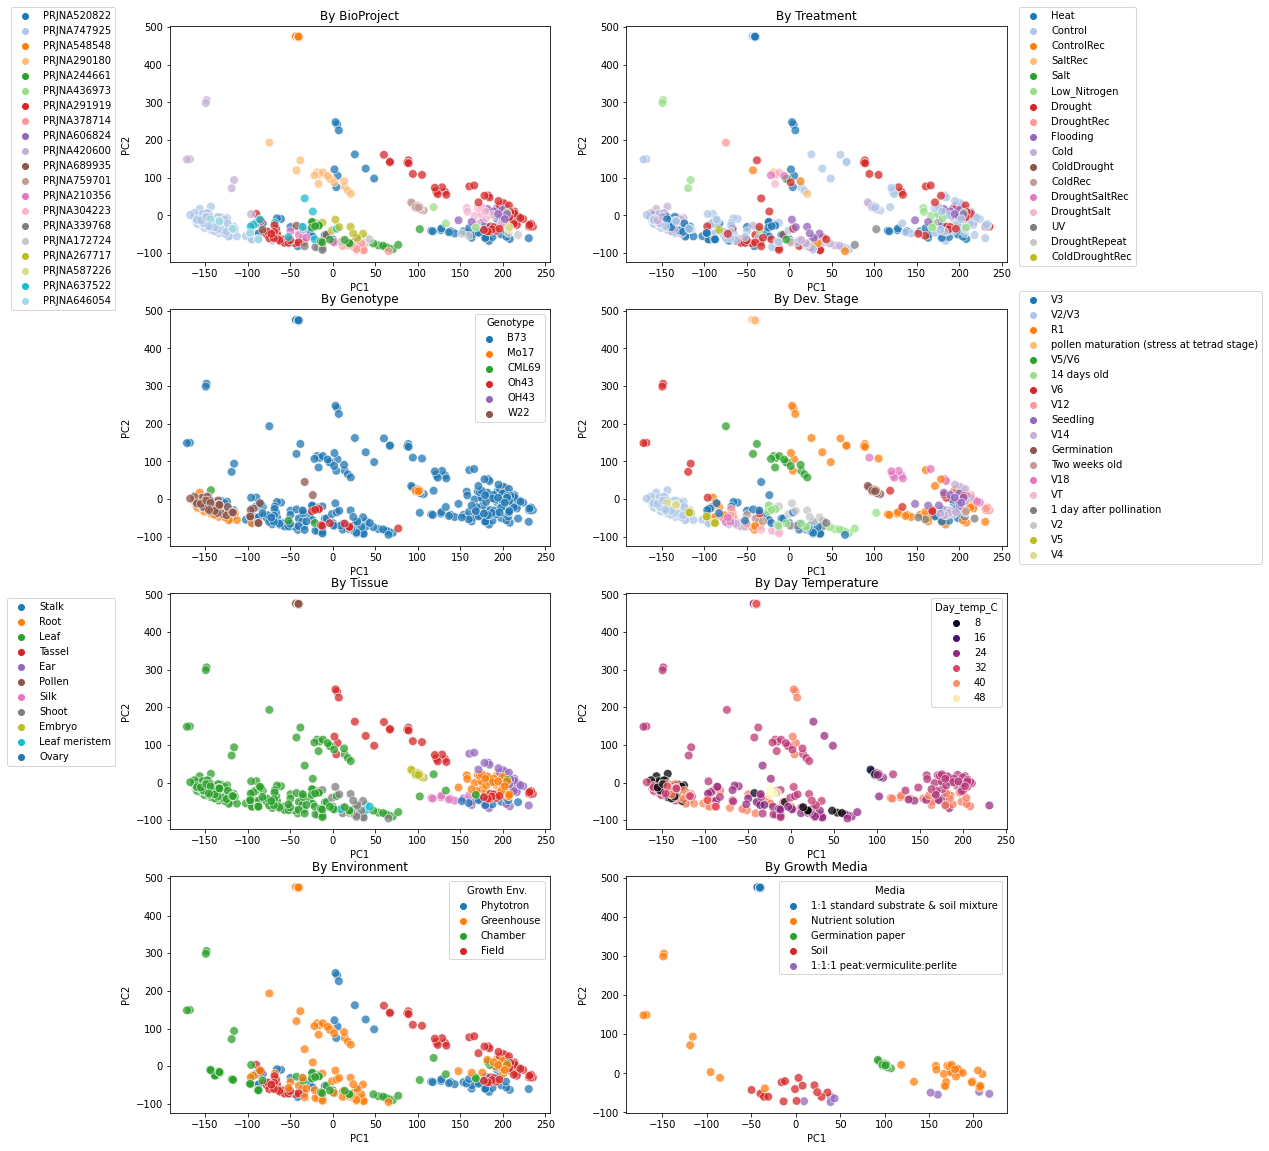

In [18]:
# make subplots & color by different things: BioProject, treatment, day temperature, dev stage, growth env, tissue, 
## genotype

fig,ax = plt.subplots(nrows=4,ncols=2,figsize = (15,20))

a = sns.scatterplot(ax=ax[0,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["BioProject"],palette="tab20",s=75,alpha=0.75)
a.set_title("By BioProject",fontsize=12)
a.legend(bbox_to_anchor=(-0.13,1.1))
b = sns.scatterplot(ax=ax[0,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],palette="tab20",s=75,alpha=0.75)
b.set_title("By Treatment",fontsize=12)
b.legend(bbox_to_anchor=(1.02,1.1))
sns.scatterplot(ax=ax[1,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Genotype"],palette="tab10",s=75,alpha=0.75).set_title("By Genotype",fontsize=12)
d = sns.scatterplot(ax=ax[1,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Developmental_stage"],palette="tab20",s=75,alpha=0.75)
d.set_title("By Dev. Stage",fontsize=12)
d.legend(bbox_to_anchor=(1.02,1.1))
e = sns.scatterplot(ax=ax[2,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Tissue"],palette="tab10",s=75,alpha=0.75)
e.set_title("By Tissue",fontsize=12)
e.legend(bbox_to_anchor=(-0.13,1))
sns.scatterplot(ax=ax[2,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Day_temp_C"],palette="magma",s=75,alpha=0.75).set_title("By Day Temperature",fontsize=12)
sns.scatterplot(ax=ax[3,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Growth Env."],palette="tab10",s=75,alpha=0.75).set_title("By Environment",fontsize=12)
sns.scatterplot(ax=ax[3,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Media"],palette="tab10",s=75,alpha=0.75).set_title("By Growth Media",fontsize=12)

plt.savefig("MapB73_Uncorrected_PCA_28-Apr-2023.pdf",bbox_inches="tight")
plt.savefig("MapB73_Uncorrected_PCA_28-Apr-2023.png",bbox_inches="tight")

Re-run PCA but only on leaf data.

In [19]:
# subset vttpm_log_merged to only leaf samples
vttpm_log_leaf = vttpm_log_merged[vttpm_log_merged["Tissue"]=="Leaf"]

In [20]:
# list of samples for leaf:
leafsamp = list(vttpm_log_leaf["SRA_number"])
leafsamp

['SRR15241108',
 'SRR15241156',
 'SRR8857746',
 'SRR15241170',
 'SRR2106196',
 'SRR1819617',
 'SRR15241104',
 'SRR15241145',
 'SRR2106184',
 'SRR15241201',
 'SRR15241167',
 'SRR8857744',
 'SRR15241274',
 'SRR15241262',
 'SRR1819621',
 'SRR15241190',
 'SRR8857774',
 'SRR15241179',
 'SRR1819198',
 'SRR15241361',
 'SRR8857825',
 'SRR15241109',
 'SRR15241168',
 'SRR8857769',
 'SRR8857831',
 'SRR15241115',
 'SRR2106200',
 'SRR15241117',
 'SRR8857762',
 'SRR15241116',
 'SRR15241384',
 'SRR2106202',
 'SRR15241362',
 'SRR8857742',
 'SRR15241111',
 'SRR1238715',
 'SRR8857768',
 'SRR1238719',
 'SRR15241250',
 'SRR15241105',
 'SRR8857772',
 'SRR2106180',
 'SRR1819196',
 'SRR15241113',
 'SRR1238718',
 'SRR2106198',
 'SRR8857773',
 'SRR15241107',
 'SRR15241212',
 'SRR15241114',
 'SRR15241112',
 'SRR8857767',
 'SRR15241296',
 'SRR8857747',
 'SRR15241106',
 'SRR15241285',
 'SRR2106182',
 'SRR15241360',
 'SRR8857771',
 'SRR15241169',
 'SRR8857826',
 'SRR15241359',
 'SRR2106186',
 'SRR8857770',
 'SRR15

In [21]:
# go back to transposed TPM file and subset to only leaf samples
ttpm.reset_index(inplace=True)
ttpml = ttpm[ttpm["index"].isin(leafsamp)]
ttpml.set_index("index",inplace=True)

In [22]:
ttpml.drop(["level_0"],axis=1,inplace=True)

KeyError: "['level_0'] not found in axis"

In [24]:
vttpml = variance_threshold_selector(ttpml)
vttpml.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442830,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
index,,,,,,,,,,,,,,,,,,,,,
SRR15241108,15.116249,0.808690,0.000000,35.563727,0.000000,10.080573,0.000000,0.0,0.288952,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.480562,0.0,0.0,0.000000
SRR15241156,13.781893,0.565147,0.000000,18.684174,0.000000,9.818174,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.228073,0.0,0.0,0.413354,0.0,0.0,0.880361
SRR8857746,32.421567,1.344191,2.733165,28.603220,0.000000,36.939687,0.489093,0.0,1.580797,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.379264,0.0,0.0,0.000000
SRR15241170,13.266106,1.035099,0.000000,22.302009,0.000000,7.056429,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.726964
SRR2106196,5.291619,18.872878,0.000000,4.794730,1.360438,8.090446,0.000000,0.0,0.792070,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.168468,0.0,0.0,0.327263


In [25]:
len(ttpml.columns)-len(vttpml.columns)

636

In this case, variance thresholding removed 636 genes.

In [26]:
vttpml_log = vttpml.apply(lambda x: np.log2(x+1))
vttpml_log.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442830,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
index,,,,,,,,,,,,,,,,,,,,,
SRR15241108,4.010444,0.854945,0.000000,5.192341,0.000000,3.469961,0.000000,0.0,0.366199,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.566145,0.0,0.0,0.000000
SRR15241156,3.885759,0.646298,0.000000,4.298964,0.000000,3.435385,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.296396,0.0,0.0,0.499123,0.0,0.0,0.911010
SRR8857746,5.062707,1.229090,1.900399,4.887682,0.000000,5.245636,0.574434,0.0,1.367817,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.463899,0.0,0.0,0.000000
SRR15241170,3.834520,1.025099,0.000000,4.542382,0.000000,3.010141,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.788238
SRR2106196,2.653431,4.312729,0.000000,2.534741,1.239055,3.184351,0.000000,0.0,0.841627,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.224618,0.0,0.0,0.408454


In [27]:
pca = PCA(n_components=2)
real_PCs = pca.fit_transform(vttpml_log)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])

In [28]:
pca.explained_variance_ratio_

array([0.2163491 , 0.14259103])

In [29]:
vttpml_log.reset_index(inplace=True)
vttpml_log.head()

GeneID,index,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442830,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR15241108,4.010444,0.854945,0.000000,5.192341,0.000000,3.469961,0.000000,0.0,0.366199,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.566145,0.0,0.0,0.000000
1,SRR15241156,3.885759,0.646298,0.000000,4.298964,0.000000,3.435385,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.296396,0.0,0.0,0.499123,0.0,0.0,0.911010
2,SRR8857746,5.062707,1.229090,1.900399,4.887682,0.000000,5.245636,0.574434,0.0,1.367817,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.463899,0.0,0.0,0.000000
3,SRR15241170,3.834520,1.025099,0.000000,4.542382,0.000000,3.010141,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.788238
4,SRR2106196,2.653431,4.312729,0.000000,2.534741,1.239055,3.184351,0.000000,0.0,0.841627,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.224618,0.0,0.0,0.408454


In [30]:
vttpml_log.rename(columns={"index":"SRA_number"},inplace=True)
vttpml_log.head()

GeneID,SRA_number,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442830,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR15241108,4.010444,0.854945,0.000000,5.192341,0.000000,3.469961,0.000000,0.0,0.366199,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.566145,0.0,0.0,0.000000
1,SRR15241156,3.885759,0.646298,0.000000,4.298964,0.000000,3.435385,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.296396,0.0,0.0,0.499123,0.0,0.0,0.911010
2,SRR8857746,5.062707,1.229090,1.900399,4.887682,0.000000,5.245636,0.574434,0.0,1.367817,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.463899,0.0,0.0,0.000000
3,SRR15241170,3.834520,1.025099,0.000000,4.542382,0.000000,3.010141,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.788238
4,SRR2106196,2.653431,4.312729,0.000000,2.534741,1.239055,3.184351,0.000000,0.0,0.841627,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.224618,0.0,0.0,0.408454


In [31]:
vttpml_log_merged = vttpml_log.merge(md,how="inner")
vttpml_log_merged.head()

,SRA_number,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,SRR15241108,4.010444,0.854945,0.000000,5.192341,0.000000,3.469961,0.000000,0.0,0.366199,...,V2/V3,Leaf,16.0,30.0,20.0,NaN,NaN,NaN,NaN,NaN
1,SRR15241156,3.885759,0.646298,0.000000,4.298964,0.000000,3.435385,0.000000,0.0,0.000000,...,V2/V3,Leaf,16.0,39.0,29.0,NaN,NaN,NaN,NaN,NaN
2,SRR8857746,5.062707,1.229090,1.900399,4.887682,0.000000,5.245636,0.574434,0.0,1.367817,...,R1,Leaf,14.0,38.0,NaN,65,NaN,Phytotron,NaN,NaN
3,SRR15241170,3.834520,1.025099,0.000000,4.542382,0.000000,3.010141,0.000000,0.0,0.000000,...,V2/V3,Leaf,16.0,30.0,20.0,NaN,NaN,NaN,NaN,NaN
4,SRR2106196,2.653431,4.312729,0.000000,2.534741,1.239055,3.184351,0.000000,0.0,0.841627,...,V5/V6,Leaf,NaN,29.0,21.0,60-80,NaN,Greenhouse,NaN,NaN


In [32]:
lplotdf = pd.concat([real_PCs_df,vttpm_log_merged[["BioProject","Genotype","Treatment","Time_after_treatment","Concentration",
                                                 "Developmental_stage","Tissue","Day_length_hours","Day_temp_C","Night_temp_C",
                                                 "Relative humidity (%)","Light (umol/m2/s)","Growth Env.","Media"]]],axis=1)
lplotdf.head()

,PC1,PC2,BioProject,Genotype,Treatment,Time_after_treatment,Concentration,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media
0,-31.630239,-37.023627,PRJNA520822,B73,Heat,2 hours,NaN,V3,Stalk,14.0,38.0,NaN,65,NaN,Phytotron,NaN
1,-37.491015,-29.027652,PRJNA520822,B73,Control,0 hour,NaN,V3,Root,14.0,25.0,NaN,65,NaN,Phytotron,NaN
2,51.867869,-85.599336,PRJNA747925,B73,Control,25 hours,NaN,V2/V3,Leaf,16.0,30.0,20.0,NaN,NaN,NaN,NaN
3,-43.322843,-27.450759,PRJNA747925,B73,Heat,1 hour,NaN,V2/V3,Leaf,16.0,39.0,29.0,NaN,NaN,NaN,NaN
4,126.437707,150.828590,PRJNA520822,B73,Heat,2 hours,NaN,R1,Tassel,14.0,38.0,NaN,65,NaN,Phytotron,NaN


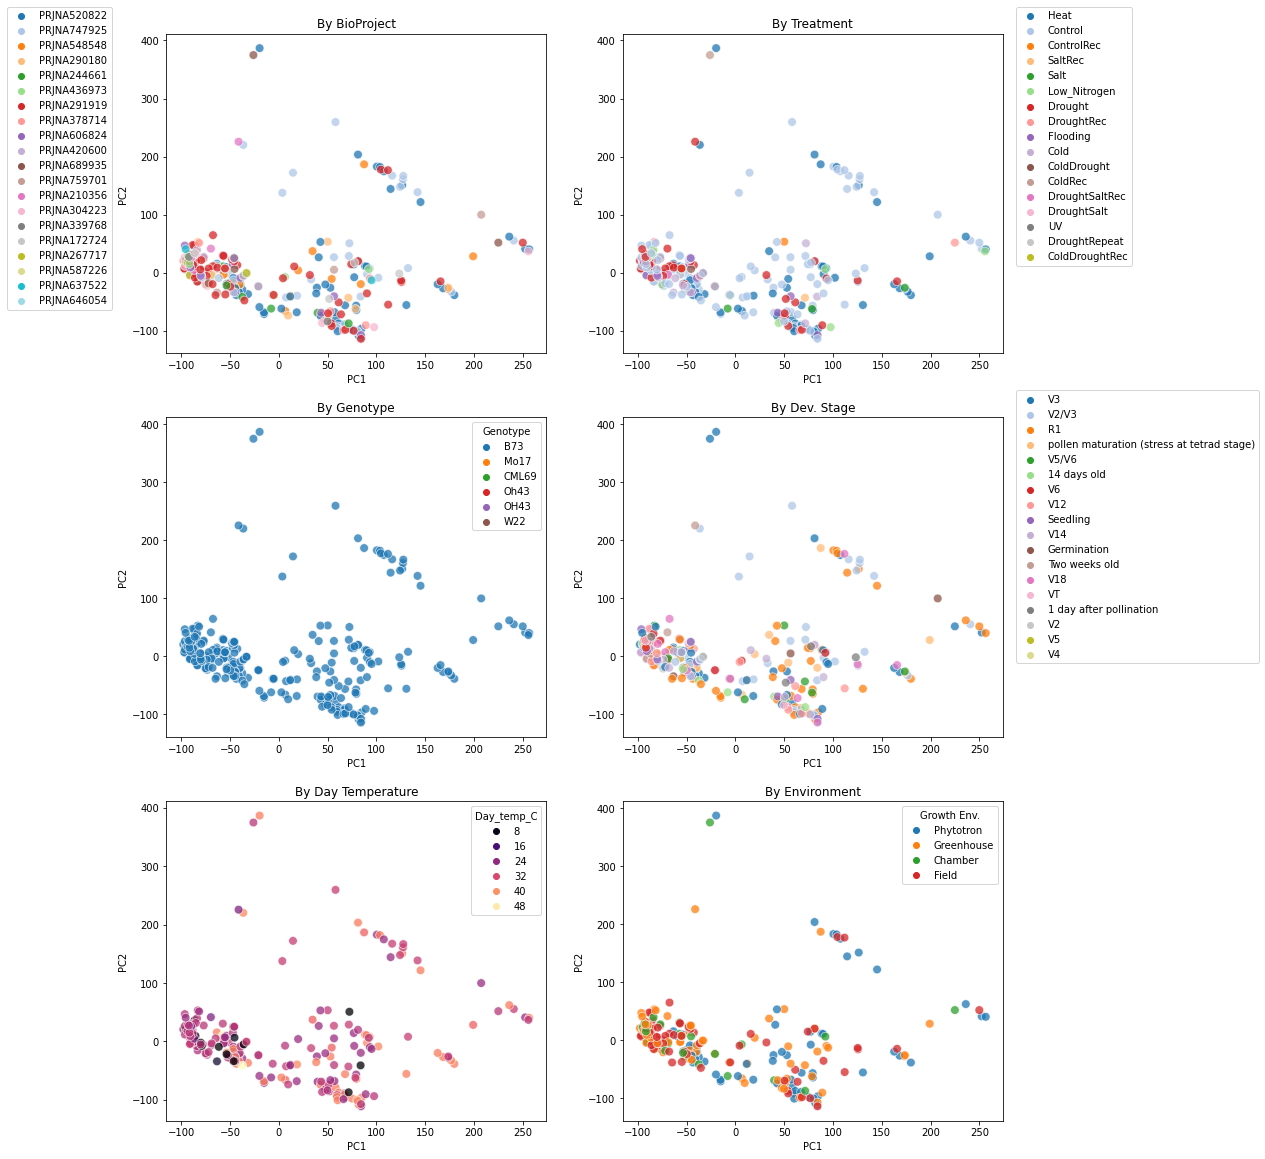

In [33]:
# make subplots & color by different things: BioProject, treatment, day temperature, dev stage, growth env, genotype

fig,ax = plt.subplots(nrows=3,ncols=2,figsize = (15,20))

a = sns.scatterplot(ax=ax[0,0],x=lplotdf["PC1"],y=lplotdf["PC2"],hue=lplotdf["BioProject"],palette="tab20",s=75,alpha=0.75)
a.set_title("By BioProject",fontsize=12)
a.legend(bbox_to_anchor=(-0.13,1.1))
b = sns.scatterplot(ax=ax[0,1],x=lplotdf["PC1"],y=lplotdf["PC2"],hue=lplotdf["Treatment"],palette="tab20",s=75,alpha=0.75)
b.set_title("By Treatment",fontsize=12)
b.legend(bbox_to_anchor=(1.02,1.1))
sns.scatterplot(ax=ax[1,0],x=lplotdf["PC1"],y=lplotdf["PC2"],hue=lplotdf["Genotype"],palette="tab10",s=75,alpha=0.75).set_title("By Genotype",fontsize=12)
d = sns.scatterplot(ax=ax[1,1],x=lplotdf["PC1"],y=lplotdf["PC2"],hue=lplotdf["Developmental_stage"],palette="tab20",s=75,alpha=0.75)
d.set_title("By Dev. Stage",fontsize=12)
d.legend(bbox_to_anchor=(1.02,1.1))
sns.scatterplot(ax=ax[2,0],x=lplotdf["PC1"],y=lplotdf["PC2"],hue=lplotdf["Day_temp_C"],palette="magma",s=75,alpha=0.75).set_title("By Day Temperature",fontsize=12)
sns.scatterplot(ax=ax[2,1],x=lplotdf["PC1"],y=lplotdf["PC2"],hue=lplotdf["Growth Env."],palette="tab10",s=75,alpha=0.75).set_title("By Environment",fontsize=12)

plt.savefig("Leaf_MapB73_Uncorrected_PCA_28-Apr-2023.pdf",bbox_inches="tight")
plt.savefig("Leaf_MapB73_Uncorrected_PCA_28-Apr-2023.png",bbox_inches="tight")

Next section: hierarchical clustering of stress response TPM in leaves and all tissues (start with all tissues). 

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [37]:
# need index to be the thing that you're clustering on
## try setting Treatment as index 
## cluster on log TPM
hclust_data = vttpm_log.merge(md[["SRA_number","Treatment"]],how="inner")
hclust_data.set_index("Treatment",inplace=True)
hclust_data.drop("SRA_number",axis=1,inplace=True)
hclust_data.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442830,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Treatment,,,,,,,,,,,,,,,,,,,,,
Heat,3.244565,6.686657,0.578058,4.881669,0.0,4.743440,0.475560,0.0,1.029656,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.341713,0.0,0.0,0.00000
Control,1.232253,5.339633,0.000000,3.055128,0.0,3.954630,1.022913,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.617084,0.0,0.0,0.00000
Control,4.010444,0.854945,0.000000,5.192341,0.0,3.469961,0.000000,0.0,0.366199,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.566145,0.0,0.0,0.00000
Heat,3.885759,0.646298,0.000000,4.298964,0.0,3.435385,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.296396,0.0,0.0,0.499123,0.0,0.0,0.91101
Heat,2.553955,3.888335,0.603243,3.024108,0.0,2.550187,0.130827,0.0,0.466365,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.015209,0.0,0.0,0.00000


In [38]:
l = linkage(hclust_data,"ward")

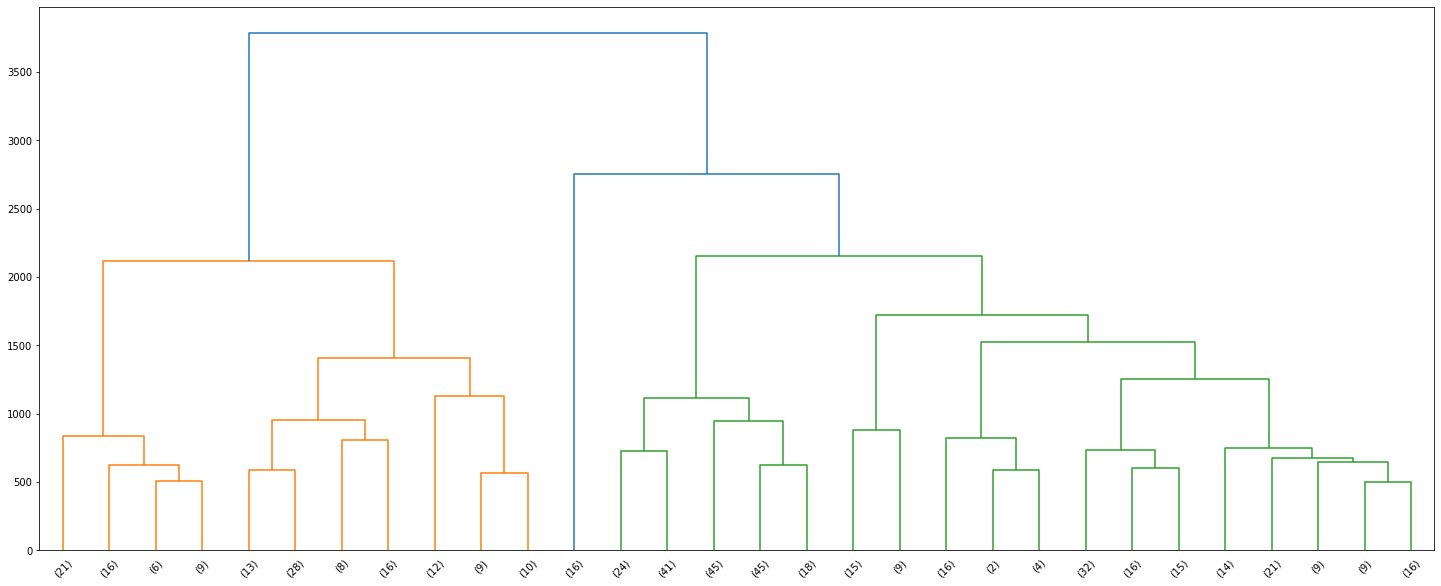

In [49]:
plt.figure(figsize=(25,10))
d = dendrogram(l,labels=hclust_data.index,truncate_mode="lastp")
plt.show(d)
#plt.savefig("hclust_515mapB73.pdf")

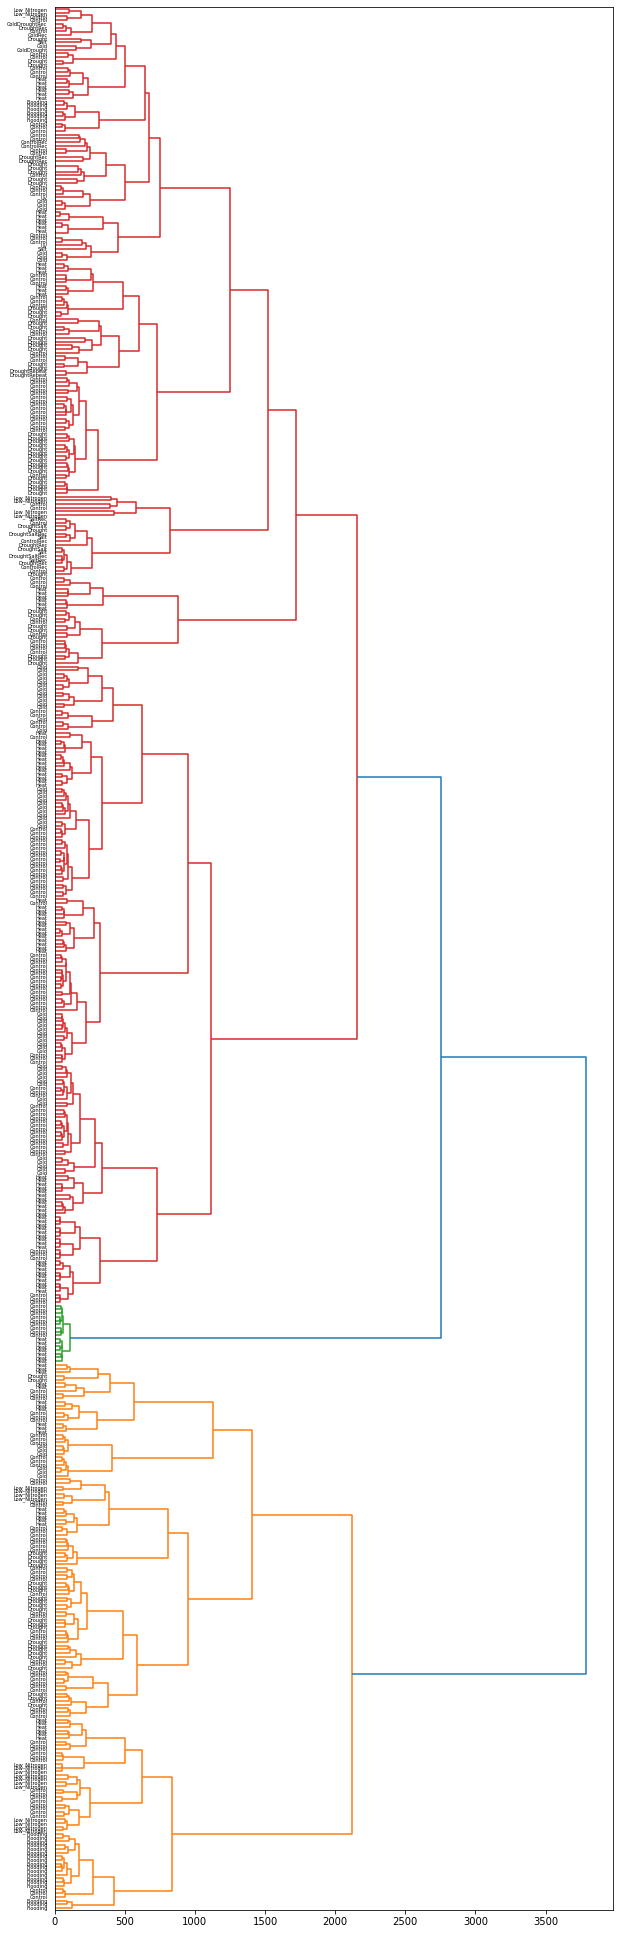

In [51]:
# un-truncated dendrogram, vertical
plt.figure(figsize=(10,35))
dendrogram(l, labels=hclust_data.index, orientation="right")
plt.show()

In [52]:
# this is not what I wanted it to be. just for fun, let's try creating a sort of summary of the TPM for each treatment 
## overall, then do hclust and plot. 

# reset index
hclust_data.reset_index(inplace=True)
hclust_data.head()

,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442830,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,Heat,3.244565,6.686657,0.578058,4.881669,0.0,4.743440,0.475560,0.0,1.029656,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.341713,0.0,0.0,0.00000
1,Control,1.232253,5.339633,0.000000,3.055128,0.0,3.954630,1.022913,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.617084,0.0,0.0,0.00000
2,Control,4.010444,0.854945,0.000000,5.192341,0.0,3.469961,0.000000,0.0,0.366199,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.566145,0.0,0.0,0.00000
3,Heat,3.885759,0.646298,0.000000,4.298964,0.0,3.435385,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.296396,0.0,0.0,0.499123,0.0,0.0,0.91101
4,Heat,2.553955,3.888335,0.603243,3.024108,0.0,2.550187,0.130827,0.0,0.466365,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.015209,0.0,0.0,0.00000


In [55]:
hclust_data["Treatment"].unique()

array(['Heat', 'Control', 'ControlRec', 'SaltRec', 'Salt', 'Low_Nitrogen',
       'Drought', 'DroughtRec', 'Flooding', 'Cold', 'ColdDrought',
       'ColdRec', 'DroughtSaltRec', 'DroughtSalt', 'UV', 'DroughtRepeat',
       'ColdDroughtRec'], dtype=object)

In [56]:
# drop certain treatments 
hcd = hclust_data[hclust_data["Treatment"].isin(["Heat","Control","Salt","Low_Nitrogen","Drought","Flooding","Cold"])]

In [58]:
hcdg = hcd.groupby(by="Treatment",axis=0).mean()

In [59]:
k = linkage(hcdg,"ward")

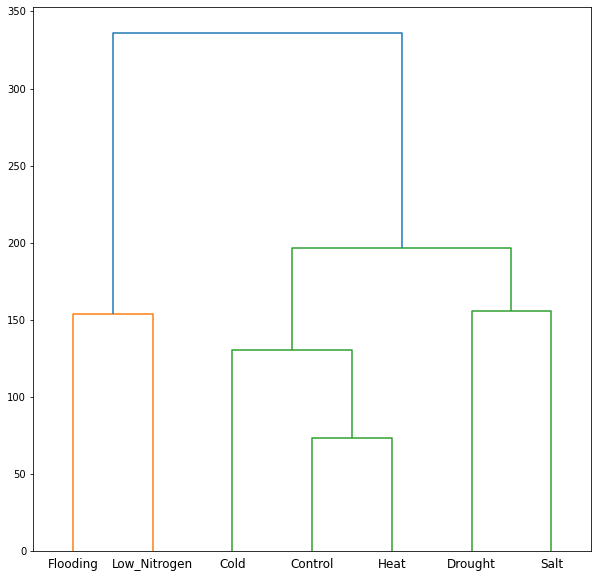

In [60]:
plt.figure(figsize=(10,10))
dendrogram(k,labels=hcdg.index)
plt.show()

Jeremy suggests grouping by treatment and clustering on the 1st PC of each treatment.